34.28608514406952
9.39845610716979
4.141531266183095
1.0282406220448765
0.23864555941373825
0.17670462935975056
0.16666563494729014
0.10807934245563285
0.09890991346616793
0.09268785588596107
0.09655666735068535
0.08325713356319808
0.07851388886491602
0.0835145920120139
0.07663222792758582
0.06681747054732068
0.06310291213307606
0.061420825171623034
0.055654806035403834
0.057242817739753316
0.05007089972511479
0.04736988629394092
0.04437720652906423
0.04215517880946487
0.04036674702367787
0.037227165607737395
0.03572478031813658
0.03393623803354543
0.031402511629571396
0.029894069561734102
0.028347421383382043
0.026725146825504534
0.02538553906244821
0.02414161375634962
0.022402820350563048
0.02121172740956792
0.02048726370186147
0.018829924106862565
0.018302109939272247
0.018861921151908875
0.016032205064880005
0.014981989725213175
0.015317288201447355
0.014105694852812524
0.01296211330698372
0.011911824293165901
0.011519685446026601
0.010802737430384863
0.010034413913542801
0.0094874

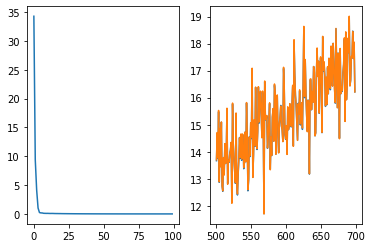

array([2., 1., 1., 2.])

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a toy data set for testing purpose
x1 = np.arange(0.0, 7, 0.01)
x2 = np.random.normal(size = len(x1))
x3 = np.random.uniform(1, 2, size = len(x1))
y = x1 * 2 + x2  + x3  + 2

plt.plot(x1, y)

df = pd.DataFrame({"x1":x1, "x2":x2, "x3":x3, "y":y})

# Split of training and testing
df_train = df.iloc[0:500, :]
df_test = df.iloc[501:, :]


# Mean squared error function
def mean_sqr_error(y, y_hat):
    n = y.shape[0]
    error = sum((y - y_hat) ** 2) / n
    #最小均方误差
    return(error)
    

# Derivative of squared error
def gradient(y, y_hat, x):
    d = -np.array(x).T.dot(y - y_hat)
    return(d)

       
# Initialise weight vector function   
def init_weight(n_vars):
    weight = np.random.normal(size = n_vars)
    return(weight)


# Prediction function
def predict(weight, x):
    y_hat = x.dot(weight)
    return(y_hat)
    

# The main SGD function
def SGD(x,
        y,
        batch_size = 5,     # number of observatin per batch
        eta = 0.001,        # learning rate
        delta_min = 0.0001, # minimum error to terminate SGD
        epoch_max = 20):    # max epoch
    
    # Initialise variables 
    n_obs = x.shape[0]          # number of observations
    x_index = np.arange(n_obs)  # row index for X
    epoch_error = []            # to record error
    
    x['bias'] = 1.0             # add biases to the original X matrix
    n_vars = x.shape[1]         # get number of variables in X
    
    n_batch = int(n_obs / batch_size)   # find out the number of batches
    weight = init_weight(n_vars)        # initialise weight vector
    
    # Iterate through epoch
    for epoch in range(epoch_max):
        
        # Initialise delta weight
        weight_delta = np.zeros(weight.shape)
        
        # Interate through batches 
        for batch in range(n_batch):
            
            # Randomly sample observations from X without replacements
            batch_index = np.random.choice(x_index, size = batch_size, replace = False)
            #从X中随机取出batch_size个序号，作为这个epoch的mini_batch
            x_batch = x.iloc[batch_index, :]
            y_batch = y[batch_index]
            
            # Iterate through every observations in the batch
            for i in range(batch_size):
                
                xi = x_batch.iloc[i, :]
                yi = y_batch.iloc[i]
                
                y_hat = predict(weight, xi)     # calculate y_hat
                #对y函数值进行估计
                weight_delta = weight_delta + gradient(y = yi, y_hat = y_hat, x = xi)
                # 计算梯度
            
            # update the weight vector after batch ends
            weight = weight - eta * (weight_delta / batch_size)
            # 更新权重
        
        # re-estimate y_hat after each epoch and record error (mse)
        y_hat = predict(weight, x)
        error = mean_sqr_error(y, y_hat)
        #计算y估计值的均方误差
        epoch_error.append(error)
        print(error)
        
        # 误差达到要求则停止训练       
        if error <= delta_min:
            break
    
    # Return weight and error log    
    return({"weight":weight, "error":epoch_error})
    

# Feed training set to SGD and build model
x_train = df_train.iloc[:, 0:3]
y_train = df_train.y

model = SGD(x_train, y_train, batch_size = 10, eta = 0.001, delta_min = 0.00001, epoch_max = 100)

plt.figure(1)
plt.subplot(1,2,1)
plt.plot(model['error'])


weight = model['weight']


# Get testing set and make prediction
x_test = df_test.iloc[:, 0:3]
y_test = df_test.y

x_test['bias'] = 1    
y_hat_test = predict(weight, x_test)    


# Print mse of the test
mean_sqr_error(y_test, y_hat_test)


# Plot actual vs. predicted
df_test.loc[:, 'y_hat'] = y_hat_test
plt.subplot(1,2,2)
plt.plot(df_test['y'])
plt.plot(df_test['y_hat'])
plt.show()



# compare with closed form solution
weight
np.linalg.inv(x_train.T.dot(x_train)).dot(x_train.T).dot(y_train)